In [10]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.layers import LeakyReLU, Dropout

In [2]:
# Load and preprocess the data
max_features = 400
maxlen = 300

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [39]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(8))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], run_eagerly=True)

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 499s 1s/step - accuracy: 0.6207 - loss: 0.6447 - val_accuracy: 0.7694 - val_loss: 0.4966
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 495s 1s/step - accuracy: 0.7627 - loss: 0.5068 - val_accuracy: 0.7445 - val_loss: 0.5300
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 498s 1s/step - accuracy: 0.6997 - loss: 0.5844 - val_accuracy: 0.7804 - val_loss: 0.4894
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 500s 1s/step - accuracy: 0.7770 - loss: 0.4842 - val_accuracy: 0.7930 - val_loss: 0.4577
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 521s 1s/step - accuracy: 0.7994 - loss: 0.4508 - val_accuracy: 0.7885 - val_loss: 0.4600
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 496s 1s/step - accuracy: 0.8045 - loss: 0.4332 - val_accuracy: 0.8167 - val_loss: 0.4199
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 505s 1s/step - accuracy: 0.8184 - loss: 0.4112 - val_accuracy: 0.8239 - val_loss: 0.3986
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 558s 1s/step - accuracy: 0.8285 - loss: 0.3872 - val_accu

In [41]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}') 

782/782 ━━━━━━━━━━━━━━━━━━━━ 265s 338ms/step - accuracy: 0.8300 - loss: 0.3847
Loss: 0.3847118616104126, Accuracy: 0.8296800255775452


782/782 ━━━━━━━━━━━━━━━━━━━━ 255s 326ms/step


<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

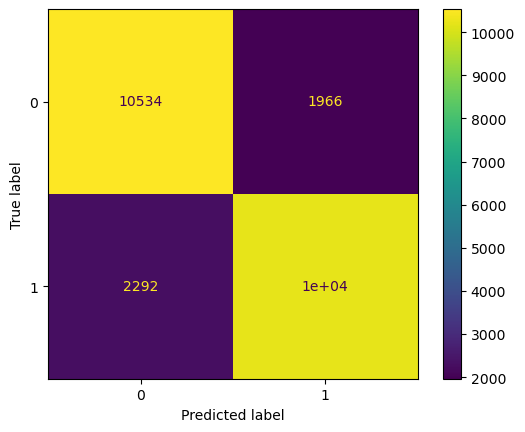

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(X_test)
cm = confusion_matrix(y_test, (predictions > 0.5).astype(int))
ConfusionMatrixDisplay(cm).plot()
confusion_matrix


In [43]:
model.save('./models/opt_2.keras')